<a href="https://colab.research.google.com/github/TaNuNian/Basicpython_ESANTH/blob/main/DS101_multiple_regression_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("/content/salecovid.csv")
df

,Month,Confirmed,nettotal
0,1,111,3009016.00
1,2,933,2376864.75
2,3,13480,2924941.75
3,4,77098,3326001.50
4,5,93701,3203833.25
5,6,93991,3480414.25
6,7,100371,3998366.25
7,8,104473,4137545.00
8,9,100985,3991190.75
9,10,113857,4195646.50


<Axes: xlabel='Confirmed', ylabel='nettotal'>

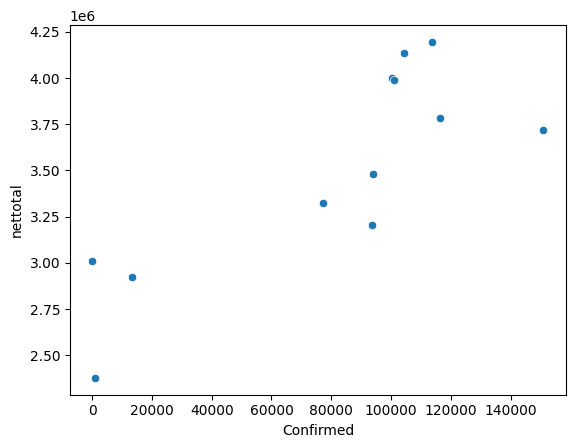

In [ ]:
sns.scatterplot(data=df, x="Confirmed", y="nettotal")

In [ ]:
feature_cols = ['Month','Confirmed']
x = df[feature_cols]
y = df.nettotal

In [ ]:
#เลือกโมเดล libarary scikit-learn
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [ ]:
#Training data
model.fit(x,y)

LinearRegression()

In [ ]:
#Test data
y_predict = model.predict(x)

In [ ]:
model.intercept_

2696093.126603287

In [ ]:
list(zip(feature_cols, model.coef_))

[('Month', 56366.11293046905), ('Confirmed', 5.583101337451028)]

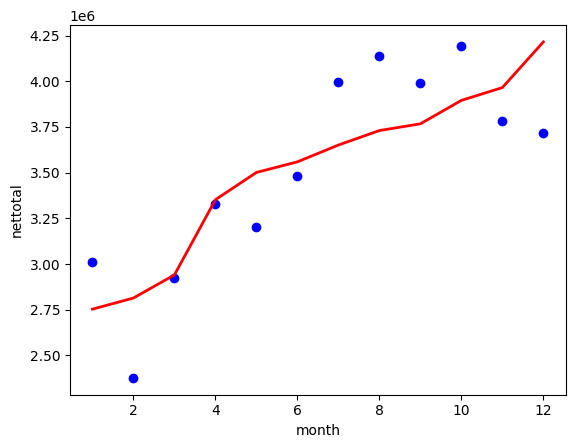

In [ ]:
plt.scatter(df.Month, y, color='b')
#plt.plot(x, y, linewidth='2', color='b')
plt.plot(df.Month, y_predict, linewidth='2', color='r')
plt.xlabel("month")
plt.ylabel("nettotal")
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
print(df.corr(method ='pearson')) # df.corr(method ='kendall')
print(model.score(x,y))
print(mean_squared_error(y, y_predict))
print(mean_absolute_error(y, y_predict))

              Month  Confirmed  nettotal
Month      1.000000   0.915667  0.809218
Confirmed  0.915667   1.000000  0.819789
nettotal   0.809218   0.819789  1.000000
0.693283287705927
88368005927.07469
255785.95370986985


In [ ]:
df["predict"] = y_predict

In [ ]:
df2 = pd.read_csv("/content/salecovid.csv")
df2["predict"] = y_predict
df2

,Month,Confirmed,nettotal,predict
0,1,111,3009016.00,2.753079e+06
1,2,933,2376864.75,2.814034e+06
2,3,13480,2924941.75,2.940452e+06
3,4,77098,3326001.50,3.352004e+06
4,5,93701,3203833.25,3.501066e+06
5,6,93991,3480414.25,3.559051e+06
6,7,100371,3998366.25,3.651037e+06
7,8,104473,4137545.00,3.730305e+06
8,9,100985,3991190.75,3.767198e+06
9,10,113857,4195646.50,3.895429e+06


In [ ]:
y_predict_Future = model.predict([[1, 40119.10 ],[2, 31225.98]])
print(y_predict_Future)

[2976448.24040109 2983163.16316544]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [ ]:
d_unseen = {'Month': [13, 14], 'nettotal': ['','']}
df_unseen = pd.DataFrame(data=d_unseen)
df_unseen["predict"] = y_predict_Future
df_unseen

,Month,nettotal,predict
0,13,,2.976448e+06
1,14,,2.983163e+06


In [ ]:
mergedata = pd.concat([df2,df_unseen], axis=0)

In [ ]:
mergedata

,Month,Confirmed,nettotal,predict
0,1,111.0,3009016.0,2.753079e+06
1,2,933.0,2376864.75,2.814034e+06
2,3,13480.0,2924941.75,2.940452e+06
3,4,77098.0,3326001.5,3.352004e+06
4,5,93701.0,3203833.25,3.501066e+06
5,6,93991.0,3480414.25,3.559051e+06
6,7,100371.0,3998366.25,3.651037e+06
7,8,104473.0,4137545.0,3.730305e+06
8,9,100985.0,3991190.75,3.767198e+06
9,10,113857.0,4195646.5,3.895429e+06
